In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("heart.csv")

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

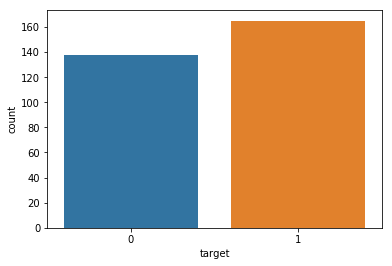

In [5]:
sns.countplot(x="target", data=df)
plt.show()

In [6]:
NoDisease = len(df[df.target==0])
HaveDisease = len(df[df.target==1])
print("%age of Patient have not heart disease: {:.2f}%".format((NoDisease/(len(df.target)))*100))
print("%age of Patient have heart disease: {:.2f}%".format((HaveDisease/(len(df.target)))*100))

%age of Patient have not heart disease: 45.54%
%age of Patient have heart disease: 54.46%


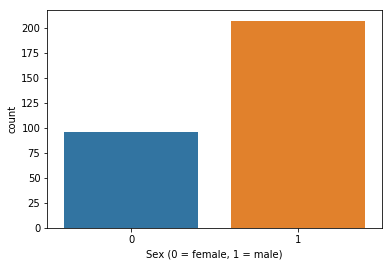

In [7]:
sns.countplot(x='sex', data=df)
plt.xlabel("Sex (0 = female, 1 = male)")
plt.show()

In [8]:
Female = len(df[df.sex==0])
Male = len(df[df.sex==1])
print("%age of female: {:.2f}%".format((Female/(len(df.sex)))*100))
print("%age of male: {:.2f}%".format((Male/(len(df.sex)))*100))

%age of female: 31.68%
%age of male: 68.32%


In [9]:
df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


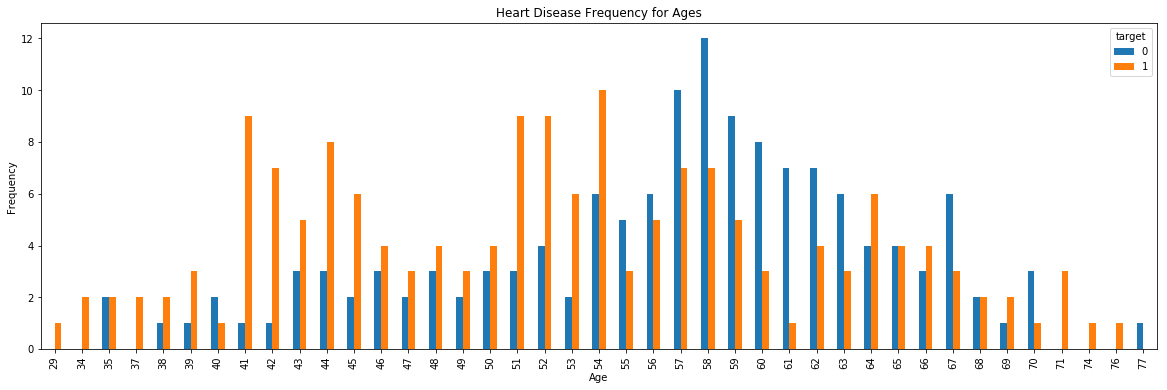

In [10]:
pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

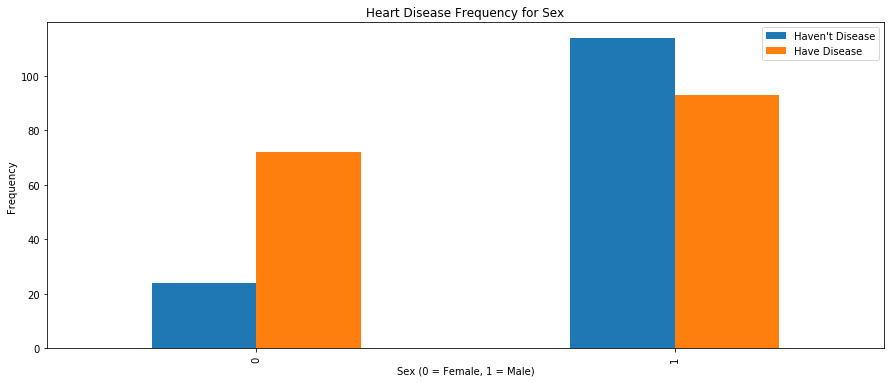

In [11]:
pd.crosstab(df.sex,df.target).plot(kind="bar",figsize=(15,6))
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

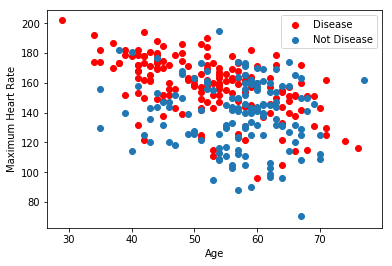

In [12]:
plt.scatter(x=df.age[df.target==1], y=df.thalach[(df.target==1)], c="red")
plt.scatter(x=df.age[df.target==0], y=df.thalach[(df.target==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

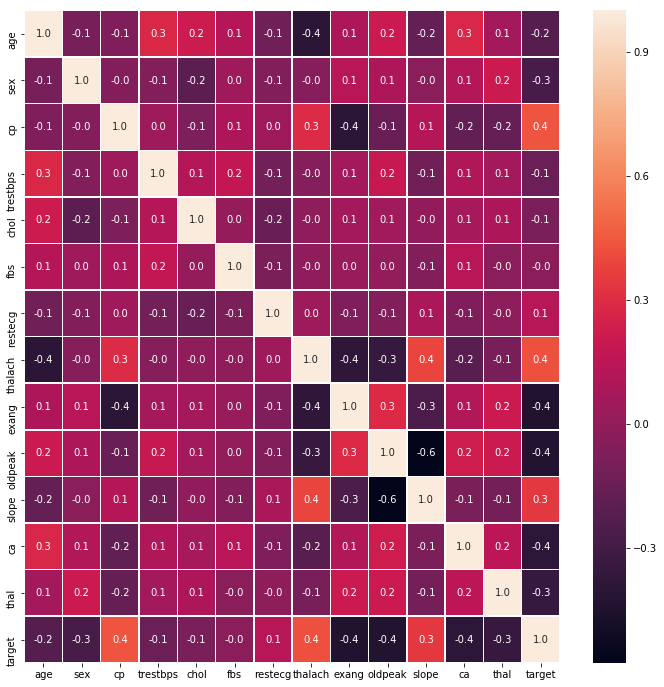

In [13]:
f,ax = plt.subplots(figsize=(12,12))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

In [15]:
import findspark
findspark.init()
import pyspark

sc = pyspark.SparkContext(appName="Heart")


In [16]:
from pyspark.sql import SQLContext

sqlContext = SQLContext(sc)
sdf = sqlContext.createDataFrame(df)

In [17]:
sdf.show()

+---+---+---+--------+----+---+-------+-------+-----+-------+-----+---+----+------+
|age|sex| cp|trestbps|chol|fbs|restecg|thalach|exang|oldpeak|slope| ca|thal|target|
+---+---+---+--------+----+---+-------+-------+-----+-------+-----+---+----+------+
| 63|  1|  3|     145| 233|  1|      0|    150|    0|    2.3|    0|  0|   1|     1|
| 37|  1|  2|     130| 250|  0|      1|    187|    0|    3.5|    0|  0|   2|     1|
| 41|  0|  1|     130| 204|  0|      0|    172|    0|    1.4|    2|  0|   2|     1|
| 56|  1|  1|     120| 236|  0|      1|    178|    0|    0.8|    2|  0|   2|     1|
| 57|  0|  0|     120| 354|  0|      1|    163|    1|    0.6|    2|  0|   2|     1|
| 57|  1|  0|     140| 192|  0|      1|    148|    0|    0.4|    1|  0|   1|     1|
| 56|  0|  1|     140| 294|  0|      0|    153|    0|    1.3|    1|  0|   2|     1|
| 44|  1|  1|     120| 263|  0|      1|    173|    0|    0.0|    2|  0|   3|     1|
| 52|  1|  2|     172| 199|  1|      1|    162|    0|    0.5|    2|  0|   3|

In [18]:
sdf.dtypes

[('age', 'bigint'),
 ('sex', 'bigint'),
 ('cp', 'bigint'),
 ('trestbps', 'bigint'),
 ('chol', 'bigint'),
 ('fbs', 'bigint'),
 ('restecg', 'bigint'),
 ('thalach', 'bigint'),
 ('exang', 'bigint'),
 ('oldpeak', 'double'),
 ('slope', 'bigint'),
 ('ca', 'bigint'),
 ('thal', 'bigint'),
 ('target', 'bigint')]

In [19]:
sdf.printSchema()

root
 |-- age: long (nullable = true)
 |-- sex: long (nullable = true)
 |-- cp: long (nullable = true)
 |-- trestbps: long (nullable = true)
 |-- chol: long (nullable = true)
 |-- fbs: long (nullable = true)
 |-- restecg: long (nullable = true)
 |-- thalach: long (nullable = true)
 |-- exang: long (nullable = true)
 |-- oldpeak: double (nullable = true)
 |-- slope: long (nullable = true)
 |-- ca: long (nullable = true)
 |-- thal: long (nullable = true)
 |-- target: long (nullable = true)



In [20]:
sdf.groupBy("age").count().sort("age",ascending=False).show()

+---+-----+
|age|count|
+---+-----+
| 77|    1|
| 76|    1|
| 74|    1|
| 71|    3|
| 70|    4|
| 69|    3|
| 68|    4|
| 67|    9|
| 66|    7|
| 65|    8|
| 64|   10|
| 63|    9|
| 62|   11|
| 61|    8|
| 60|   11|
| 59|   14|
| 58|   19|
| 57|   17|
| 56|   11|
| 55|    8|
+---+-----+
only showing top 20 rows



In [21]:
from pyspark.ml.classification import LogisticRegression
sdf.printSchema()

root
 |-- age: long (nullable = true)
 |-- sex: long (nullable = true)
 |-- cp: long (nullable = true)
 |-- trestbps: long (nullable = true)
 |-- chol: long (nullable = true)
 |-- fbs: long (nullable = true)
 |-- restecg: long (nullable = true)
 |-- thalach: long (nullable = true)
 |-- exang: long (nullable = true)
 |-- oldpeak: double (nullable = true)
 |-- slope: long (nullable = true)
 |-- ca: long (nullable = true)
 |-- thal: long (nullable = true)
 |-- target: long (nullable = true)



In [22]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler
 
assembler=VectorAssembler(inputCols=['age','sex','cp','trestbps','chol','fbs','restecg','exang','oldpeak','slope','ca','thal'],outputCol='features')
 
output_data=assembler.transform(sdf)

In [23]:
output_data.printSchema()

root
 |-- age: long (nullable = true)
 |-- sex: long (nullable = true)
 |-- cp: long (nullable = true)
 |-- trestbps: long (nullable = true)
 |-- chol: long (nullable = true)
 |-- fbs: long (nullable = true)
 |-- restecg: long (nullable = true)
 |-- thalach: long (nullable = true)
 |-- exang: long (nullable = true)
 |-- oldpeak: double (nullable = true)
 |-- slope: long (nullable = true)
 |-- ca: long (nullable = true)
 |-- thal: long (nullable = true)
 |-- target: long (nullable = true)
 |-- features: vector (nullable = true)



In [24]:
final_data=output_data.select('features','target')         
train,test=final_data.randomSplit([0.7,0.3])          
model=LogisticRegression(labelCol='target')           
model=model.fit(train)        
summary=model.summary
summary.predictions.describe().show()   

+-------+------------------+-------------------+
|summary|            target|         prediction|
+-------+------------------+-------------------+
|  count|               205|                205|
|   mean|0.5219512195121951| 0.5560975609756098|
| stddev| 0.500740723447378|0.49805936161275033|
|    min|               0.0|                0.0|
|    max|               1.0|                1.0|
+-------+------------------+-------------------+



In [25]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
 
predictions=model.evaluate(test)
evaluator=BinaryClassificationEvaluator(rawPredictionCol='prediction',labelCol='target')
acc = evaluator.evaluate(predictions.predictions)
print("Accuracy = ",acc*100)

Accuracy =  88.1896551724138
